## Import Libraries

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.utils.fixes import signature
from sklearn.decomposition import PCA
%matplotlib inline
sns.set(color_codes=True)

/anaconda3/envs/coms007/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Exploration

In [4]:
data = pd.read_csv('./TAMU_FINAL_DATASET_2018.csv')

In [5]:
data.head()

ID  AGE SEX_CD  AMI_FLAG ESRD_IND HOSPICE_IND  ORIG_REAS_ENTITLE_CD  \
0   1   77      F         0        N           N                   0.0   
1   2   49      F         0        N           N                   1.0   
2   3   75      F         0        N           N                   0.0   
3   4   68      M         0        N           N                   0.0   
4   5   81      F         0        N           N                   1.0   

   RECON_MA_RISK_SCORE_NBR  RECON_RX_RISK_SCORE_NBR   PCP_ASSIGNMENT  \
0                    0.424                    0.402  MEMBER SELECTED   
1                    2.879                    1.159       ATTRIBUTED   
2                    0.638                    0.568  MEMBER SELECTED   
3                    0.584                    0.886  MEMBER SELECTED   
4                    1.242                    1.212  MEMBER SELECTED   

      ...      COL COL_GAP AMM AMM_GAP DIAB_PASS  ACE_PASS  STATIN_PASS  \
0     ...        0       0   0       0         0         0            0   
1     ...        0       0   0       0         0         0            1   
2     ...        1       0   0       0         0         1            1   
3     ...        1       1   0       0         1         1            1   
4     ...        0       0   0       0         0         0            0   

   ACE_ELIG  DIAB_ELIG  STATIN_ELIG  
0         0          0            0  
1         0          0            1  
2         1          0            1  
3         1          1            1  
4         0          0            0  

[5 rows x 448 columns]

### Univariate Analysis

In [6]:
print('The imbalance is %0.2f%%' % (len(data[data.AMI_FLAG == 1])/len(data)*100))

The imbalance is 2.73%


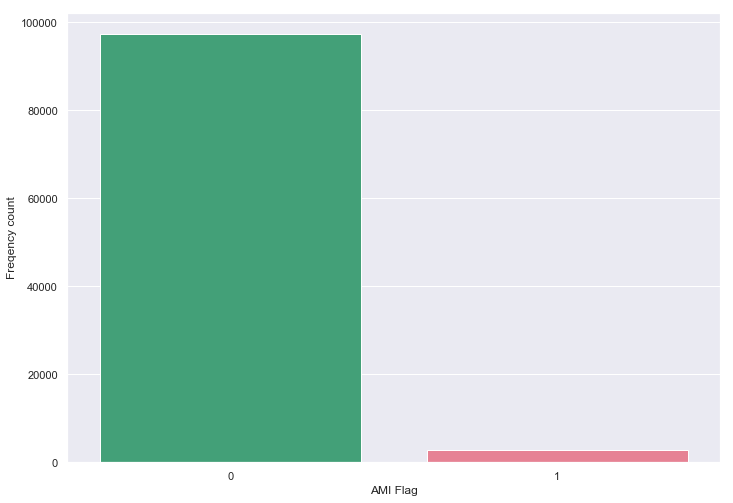

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = 'AMI_FLAG',data = data, palette = ['#33b07a', '#f77189'])
ax.set(xlabel='AMI Flag', ylabel='Freqency count')
plt.show()

In [8]:
print('The mean of the age is: %.2f years for AMI patients and %.2f for Non-AMI patients' % (data.loc[data.AMI_FLAG==1].AGE.mean(), data.loc[data.AMI_FLAG==0].AGE.mean()))
print('The mean of the age is: %d years for AMI patients and %.d for Non-AMI patients' % (data.loc[data.AMI_FLAG==1].AGE.median(),data.loc[data.AMI_FLAG==0].AGE.median()))
print('The mean of the age is: %d years' % data.loc[data.AMI_FLAG==1].AGE.mode())
print('The mean of the age is: %d years' % data.loc[data.AMI_FLAG==1].AGE.max())
print('The mean of the age is: %d years' % data.loc[data.AMI_FLAG==1].AGE.min())

The mean of the age is: 75.23 years for AMI patients and 72.70 for Non-AMI patients
The mean of the age is: 75 years for AMI patients and 73 for Non-AMI patients
The mean of the age is: 75 years
The mean of the age is: 95 years
The mean of the age is: 40 years


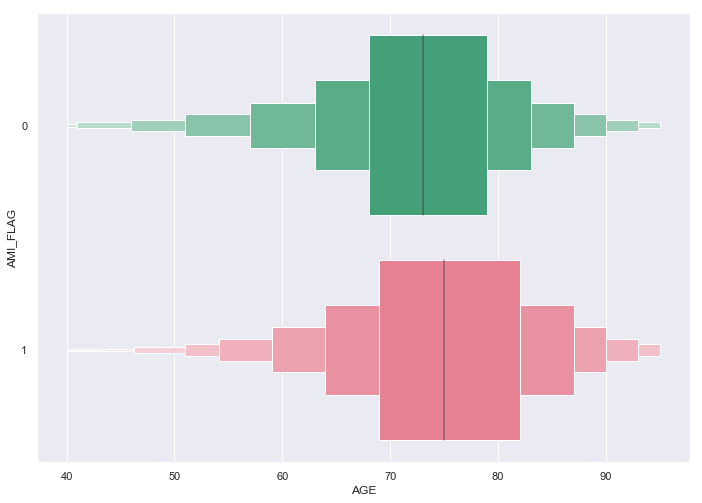

In [9]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxenplot(x = 'AGE', y = 'AMI_FLAG', data = data, linewidth = 2.5, orient= 'h', palette = ['#33b07a', '#f77189'])

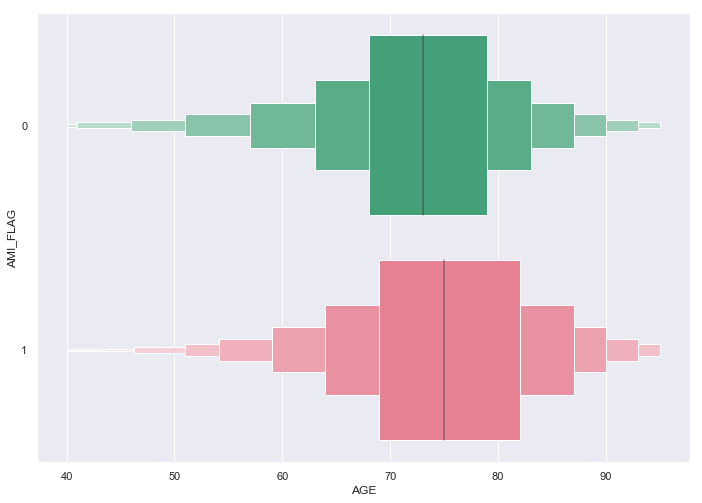

In [125]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxenplot(x = 'AGE', y = 'AMI_FLAG', data = data, linewidth = 2.5, orient= 'h', palette = ['#33b07a', '#f77189'])

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(data.loc[data.AMI_FLAG==0].AGE, bins=11, color = '#33b07a', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1].AGE, bins=11, color = '#f77189', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 2.5))
ax.set(xlabel='AGE', ylabel='Freqency count')

[Text(0,0.5,'Freqency count'), Text(0.5,0,'Sex')]

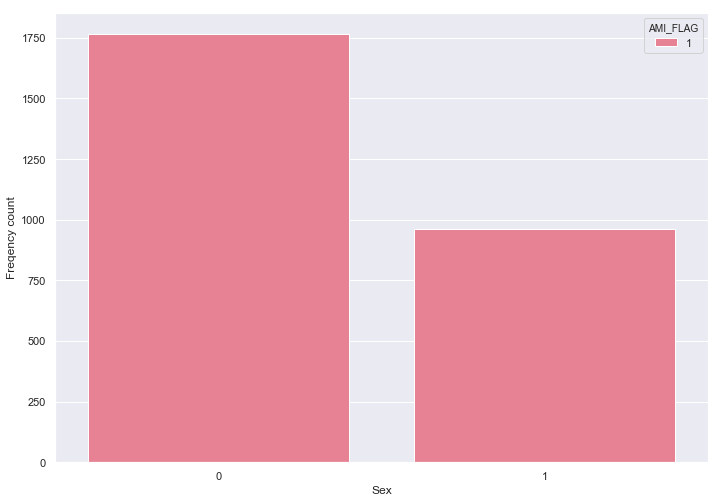

In [160]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = 'STATIN_PASS', data = data[data['AMI_FLAG'] == 1], palette = ['#f77189'], hue='AMI_FLAG')
ax.set(xlabel='Sex', ylabel='Freqency count')

[Text(0,0.5,'Freqency count'), Text(0.5,0,'Sex')]

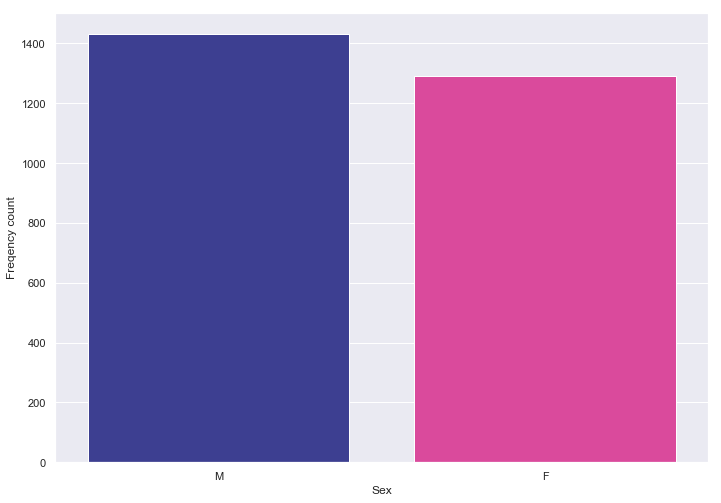

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = 'SEX_CD', data = data.loc[data.AMI_FLAG == 1], palette = ['#2F329F', '#F2329F'])
ax.set(xlabel='Sex', ylabel='Freqency count')

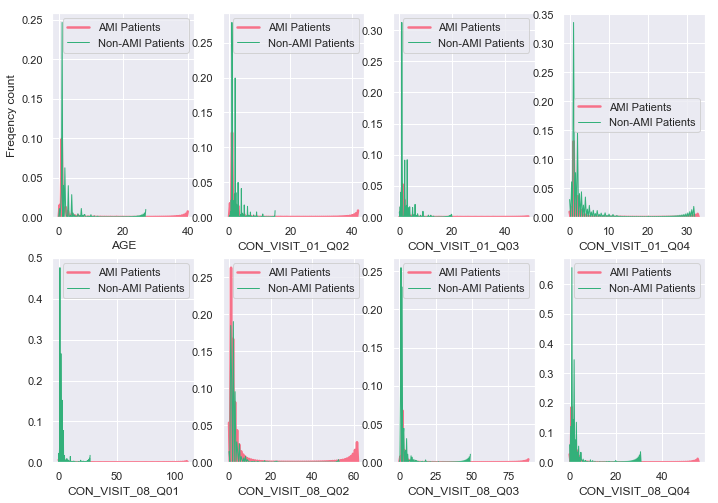

In [51]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.subplot(2, 4, 1)
ax = sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_01_Q01'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
ax = sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_01_Q01'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
plt.subplot(2, 4, 2)
sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_01_Q02'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_01_Q02'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
ax.set(xlabel='AGE', ylabel='Freqency count')
plt.subplot(2, 4, 3)
sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_01_Q03'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_01_Q03'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
ax.set(xlabel='AGE', ylabel='Freqency count')
plt.subplot(2, 4, 4)
sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_01_Q04'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_01_Q04'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
ax.set(xlabel='AGE', ylabel='Freqency count')

plt.subplot(2, 4, 5)
sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_08_Q01'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_08_Q01'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
ax.set(xlabel='AGE', ylabel='Freqency count')
plt.subplot(2, 4, 6)
sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_08_Q02'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_08_Q02'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
ax.set(xlabel='AGE', ylabel='Freqency count')
plt.subplot(2, 4, 7)
sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_08_Q03'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_08_Q03'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
ax.set(xlabel='AGE', ylabel='Freqency count')
plt.subplot(2, 4, 8)
sns.distplot(data.loc[data.AMI_FLAG==0]['CON_VISIT_08_Q04'], bins=11, color = '#f77189', hist=False, label = 'AMI Patients', kde_kws=dict(linewidth = 2.5))
sns.distplot(data.loc[data.AMI_FLAG==1]['CON_VISIT_08_Q04'], bins=11, color = '#33b07a', hist=False, label = 'Non-AMI Patients',kde_kws=dict(linewidth = 1))
ax.set(xlabel='AGE', ylabel='Freqency count')

plt.show()

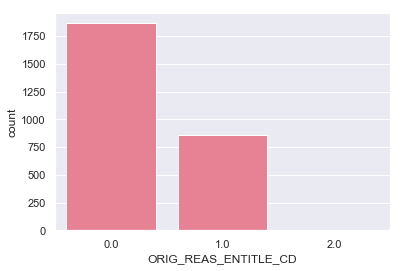

In [126]:
sns.countplot(x = 'ORIG_REAS_ENTITLE_CD', data=data.loc[data['AMI_FLAG']==1], color='#f77189')

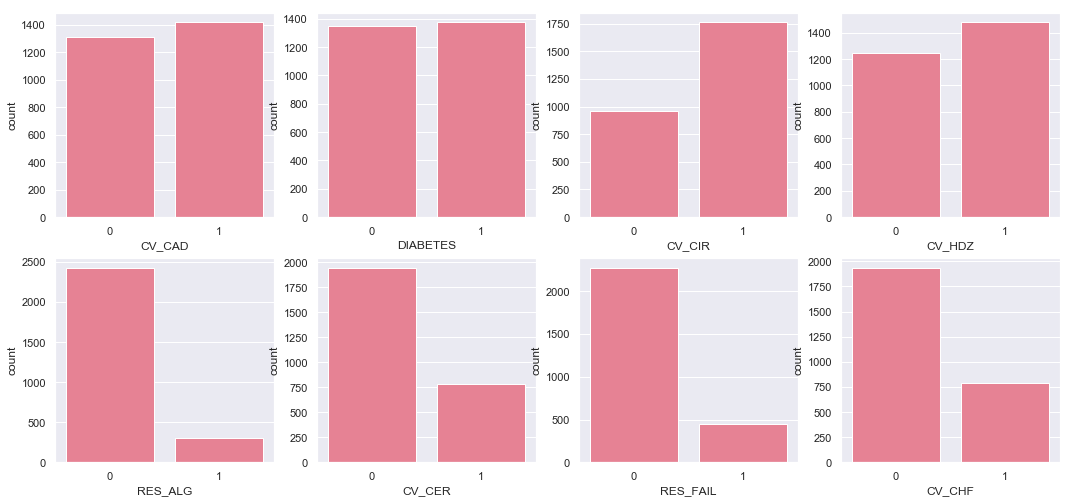

In [31]:
a4_dims = (18, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.subplot(2, 4, 1)
ax = sns.countplot(x="CV_CAD", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.subplot(2, 4, 2)
ax = sns.countplot(x="DIABETES", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.subplot(2, 4, 3)
ax = sns.countplot(x="CV_CIR", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.subplot(2, 4, 4)
ax = sns.countplot(x="CV_HDZ", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.subplot(2, 4, 5)
ax = sns.countplot(x="RES_ALG", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.subplot(2, 4, 6)
ax = sns.countplot(x="CV_CER", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.subplot(2, 4, 7)
ax = sns.countplot(x="RES_FAIL", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.subplot(2, 4, 8)
ax = sns.countplot(x="CV_CHF", data=data.loc[data['AMI_FLAG']==1], color='#f77189')
plt.show()

### Bivrariate Analysis

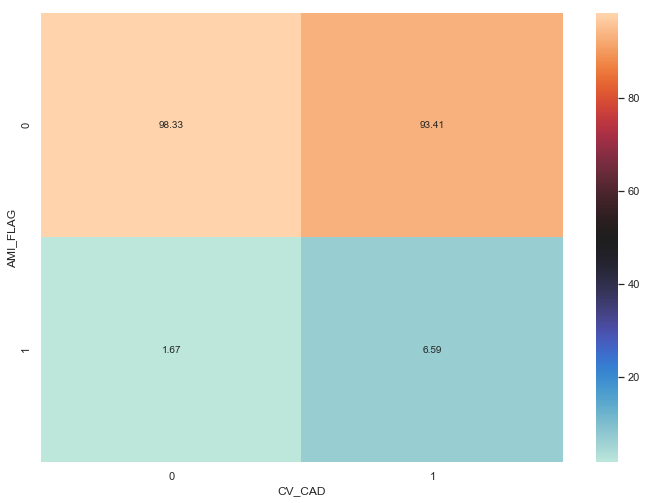

In [12]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(pd.crosstab(data.AMI_FLAG, data.CV_CAD,normalize='columns')* 100, annot= True, center = 50, fmt= '.2f')

In [152]:
data['MCO_PROD_TYPE_CD'].value_counts()

HMO     54267
LPPO    24809
RPPO    15927
PFFS     4964
Name: MCO_PROD_TYPE_CD, dtype: int64

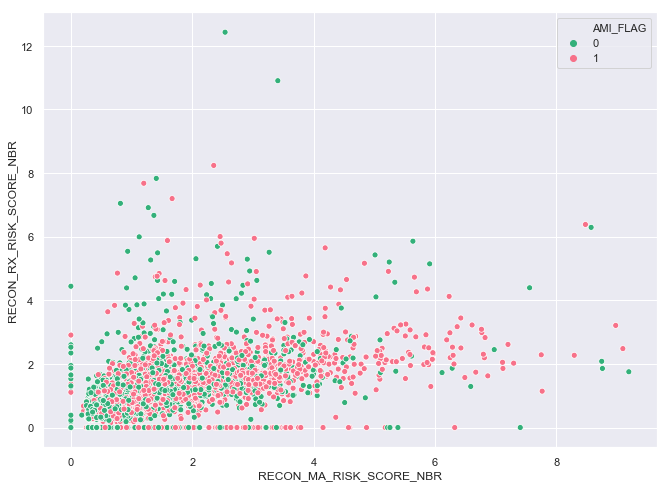

In [148]:
a4_dims = (11, 8)
fig, ax = plt.subplots(figsize=a4_dims)

# df0 = data[data['AMI_FLAG'] == 0]
# df1 = data[data['AMI_FLAG'] == 1]
# df_strat = pd.concat([df0.sample(df1.shape[0]),df1]).sample(frac = 1)

ax = sns.scatterplot(x = 'RECON_MA_RISK_SCORE_NBR', y = 'RECON_RX_RISK_SCORE_NBR', data = df_strat, hue = 'AMI_FLAG', palette = ['#33b07a', '#f77189'])

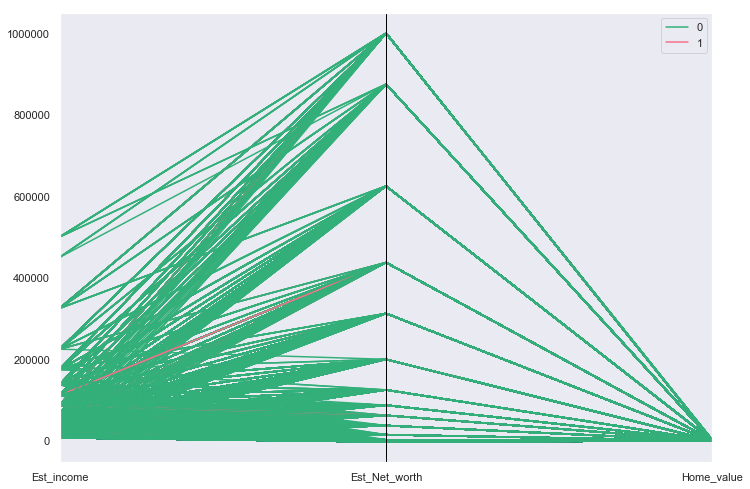

In [41]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
pd.plotting.parallel_coordinates(data.sample(n = 10000, random_state=42), axvlines = True, class_column = 'AMI_FLAG', cols = ['Est_income', 'Est_Net_worth','Home_value'], color = ['#33b07a', '#f77189'])

In [93]:
for i in data.columns.tolist():
    if i.startswith('RX_'):
        print(i)

RX_THER_17_YR2016
RX_THER_36_YR2016
RX_THER_42_YR2016
RX_THER_44_YR2016
RX_THER_58_YR2016
RX_THER_65_YR2016
RX_THER_90_YR2016
RX_THER_01_YR2016
RX_THER_05_YR2016
RX_THER_22_YR2016
RX_THER_37_YR2016
RX_THER_39_YR2016
RX_THER_43_YR2016
RX_THER_49_YR2016
RX_THER_57_YR2016
RX_THER_60_YR2016
RX_THER_28_YR2016
RX_THER_27_YR2016
RX_THER_34_YR2016
RX_THER_16_YR2016
RX_THER_41_YR2016
RX_THER_02_YR2016
RX_THER_18_YR2016
RX_THER_50_YR2016
RX_THER_97_YR2016
RX_THER_61_YR2016
RX_THER_66_YR2016
RX_THER_56_YR2016
RX_THER_03_YR2016
RX_THER_75_YR2016
RX_THER_72_YR2016
RX_THER_79_YR2016
RX_THER_12_YR2016
RX_THER_86_YR2016
RX_THER_32_YR2016
RX_THER_33_YR2016
RX_THER_21_YR2016
RX_THER_46_YR2016
RX_THER_62_YR2016
RX_THER_68_YR2016
RX_THER_94_YR2016
RX_THER_04_YR2016
RX_THER_59_YR2016
RX_THER_69_YR2016
RX_THER_85_YR2016
RX_THER_11_YR2016
RX_THER_30_YR2016
RX_THER_54_YR2016
RX_THER_31_YR2016
RX_THER_83_YR2016
RX_THER_13_YR2016
RX_THER_35_YR2016
RX_THER_89_YR2016
RX_THER_78_YR2016
RX_THER_53_YR2016
RX_THER_77

In [145]:
melted_data = pd.melt(df_strat, id_vars="AMI_FLAG", value_vars=["RX_THER_27_YR2016","RX_THER_35_YR2016","RX_THER_39_YR2016","RX_THER_72_YR2016", "RX_THER_82_YR2016", "RX_THER_83_YR2016"])

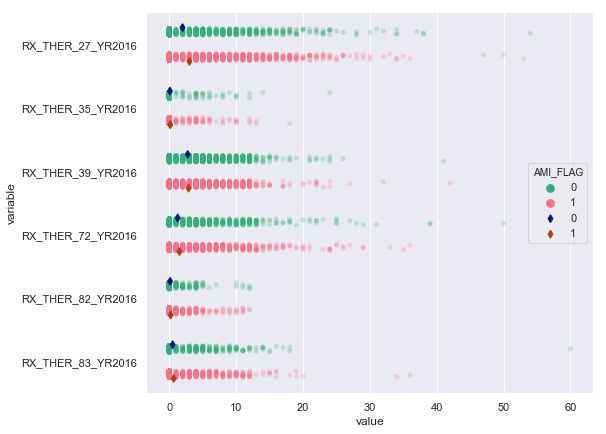

In [146]:
a4_dims = (8, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.despine(bottom=True, left=True)

ax = sns.stripplot(x="value", y="variable", hue="AMI_FLAG",
              data=melted_data, dodge=True, jitter=True,
              alpha=.25, zorder=1, palette = ['#33b07a', '#f77189'])

# Show the conditional means
ax = sns.pointplot(x="value", y="variable", hue="AMI_FLAG",
              data=melted_data, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

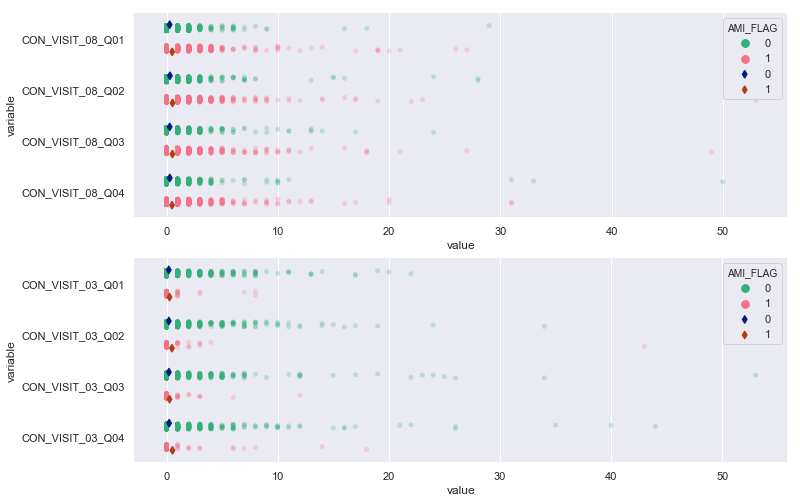

In [147]:
melted_data = pd.melt(df_strat, id_vars="AMI_FLAG", value_vars=["CON_VISIT_08_Q01","CON_VISIT_08_Q02","CON_VISIT_08_Q03","CON_VISIT_08_Q04"])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.subplot(2, 1, 1)
sns.despine(bottom=True, left=True)

ax = sns.stripplot(x="value", y="variable", hue="AMI_FLAG",
              data=melted_data, dodge=True, jitter=True,
              alpha=.25, zorder=1, palette = ['#33b07a', '#f77189'])

# Show the conditional means
ax = sns.pointplot(x="value", y="variable", hue="AMI_FLAG",
              data=melted_data, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

melted_data = pd.melt(data.sample(n = 5000, random_state= 42), id_vars="AMI_FLAG", value_vars=["CON_VISIT_03_Q01","CON_VISIT_03_Q02","CON_VISIT_03_Q03","CON_VISIT_03_Q04"])

plt.subplot(2, 1, 2)
sns.despine(bottom=True, left=True)

ax = sns.stripplot(x="value", y="variable", hue="AMI_FLAG",
              data=melted_data, dodge=True, jitter=True,
              alpha=.25, zorder=1, palette = ['#33b07a', '#f77189'])

# Show the conditional means
ax = sns.pointplot(x="value", y="variable", hue="AMI_FLAG",
              data=melted_data, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)
# ax.set(xlim =(0,20), ylim = (0,20))
# Improve the legend 

### Multivariate Plot

In [ ]:
data['Est_Net_worth']

In [18]:
data['Est_income'].value_counts()

7500.0      13673
87500.0     11919
67500.0     10915
55000.0      9348
45000.0      9008
25000.0      8557
35000.0      8500
112000.0     5763
17500.0      4573
137500.0     2477
175000.0     1879
225000.0      718
325000.0      349
500000.0      100
450000.0       42
Name: Est_income, dtype: int64

TypeError: 'numpy.int64' object is not iterable

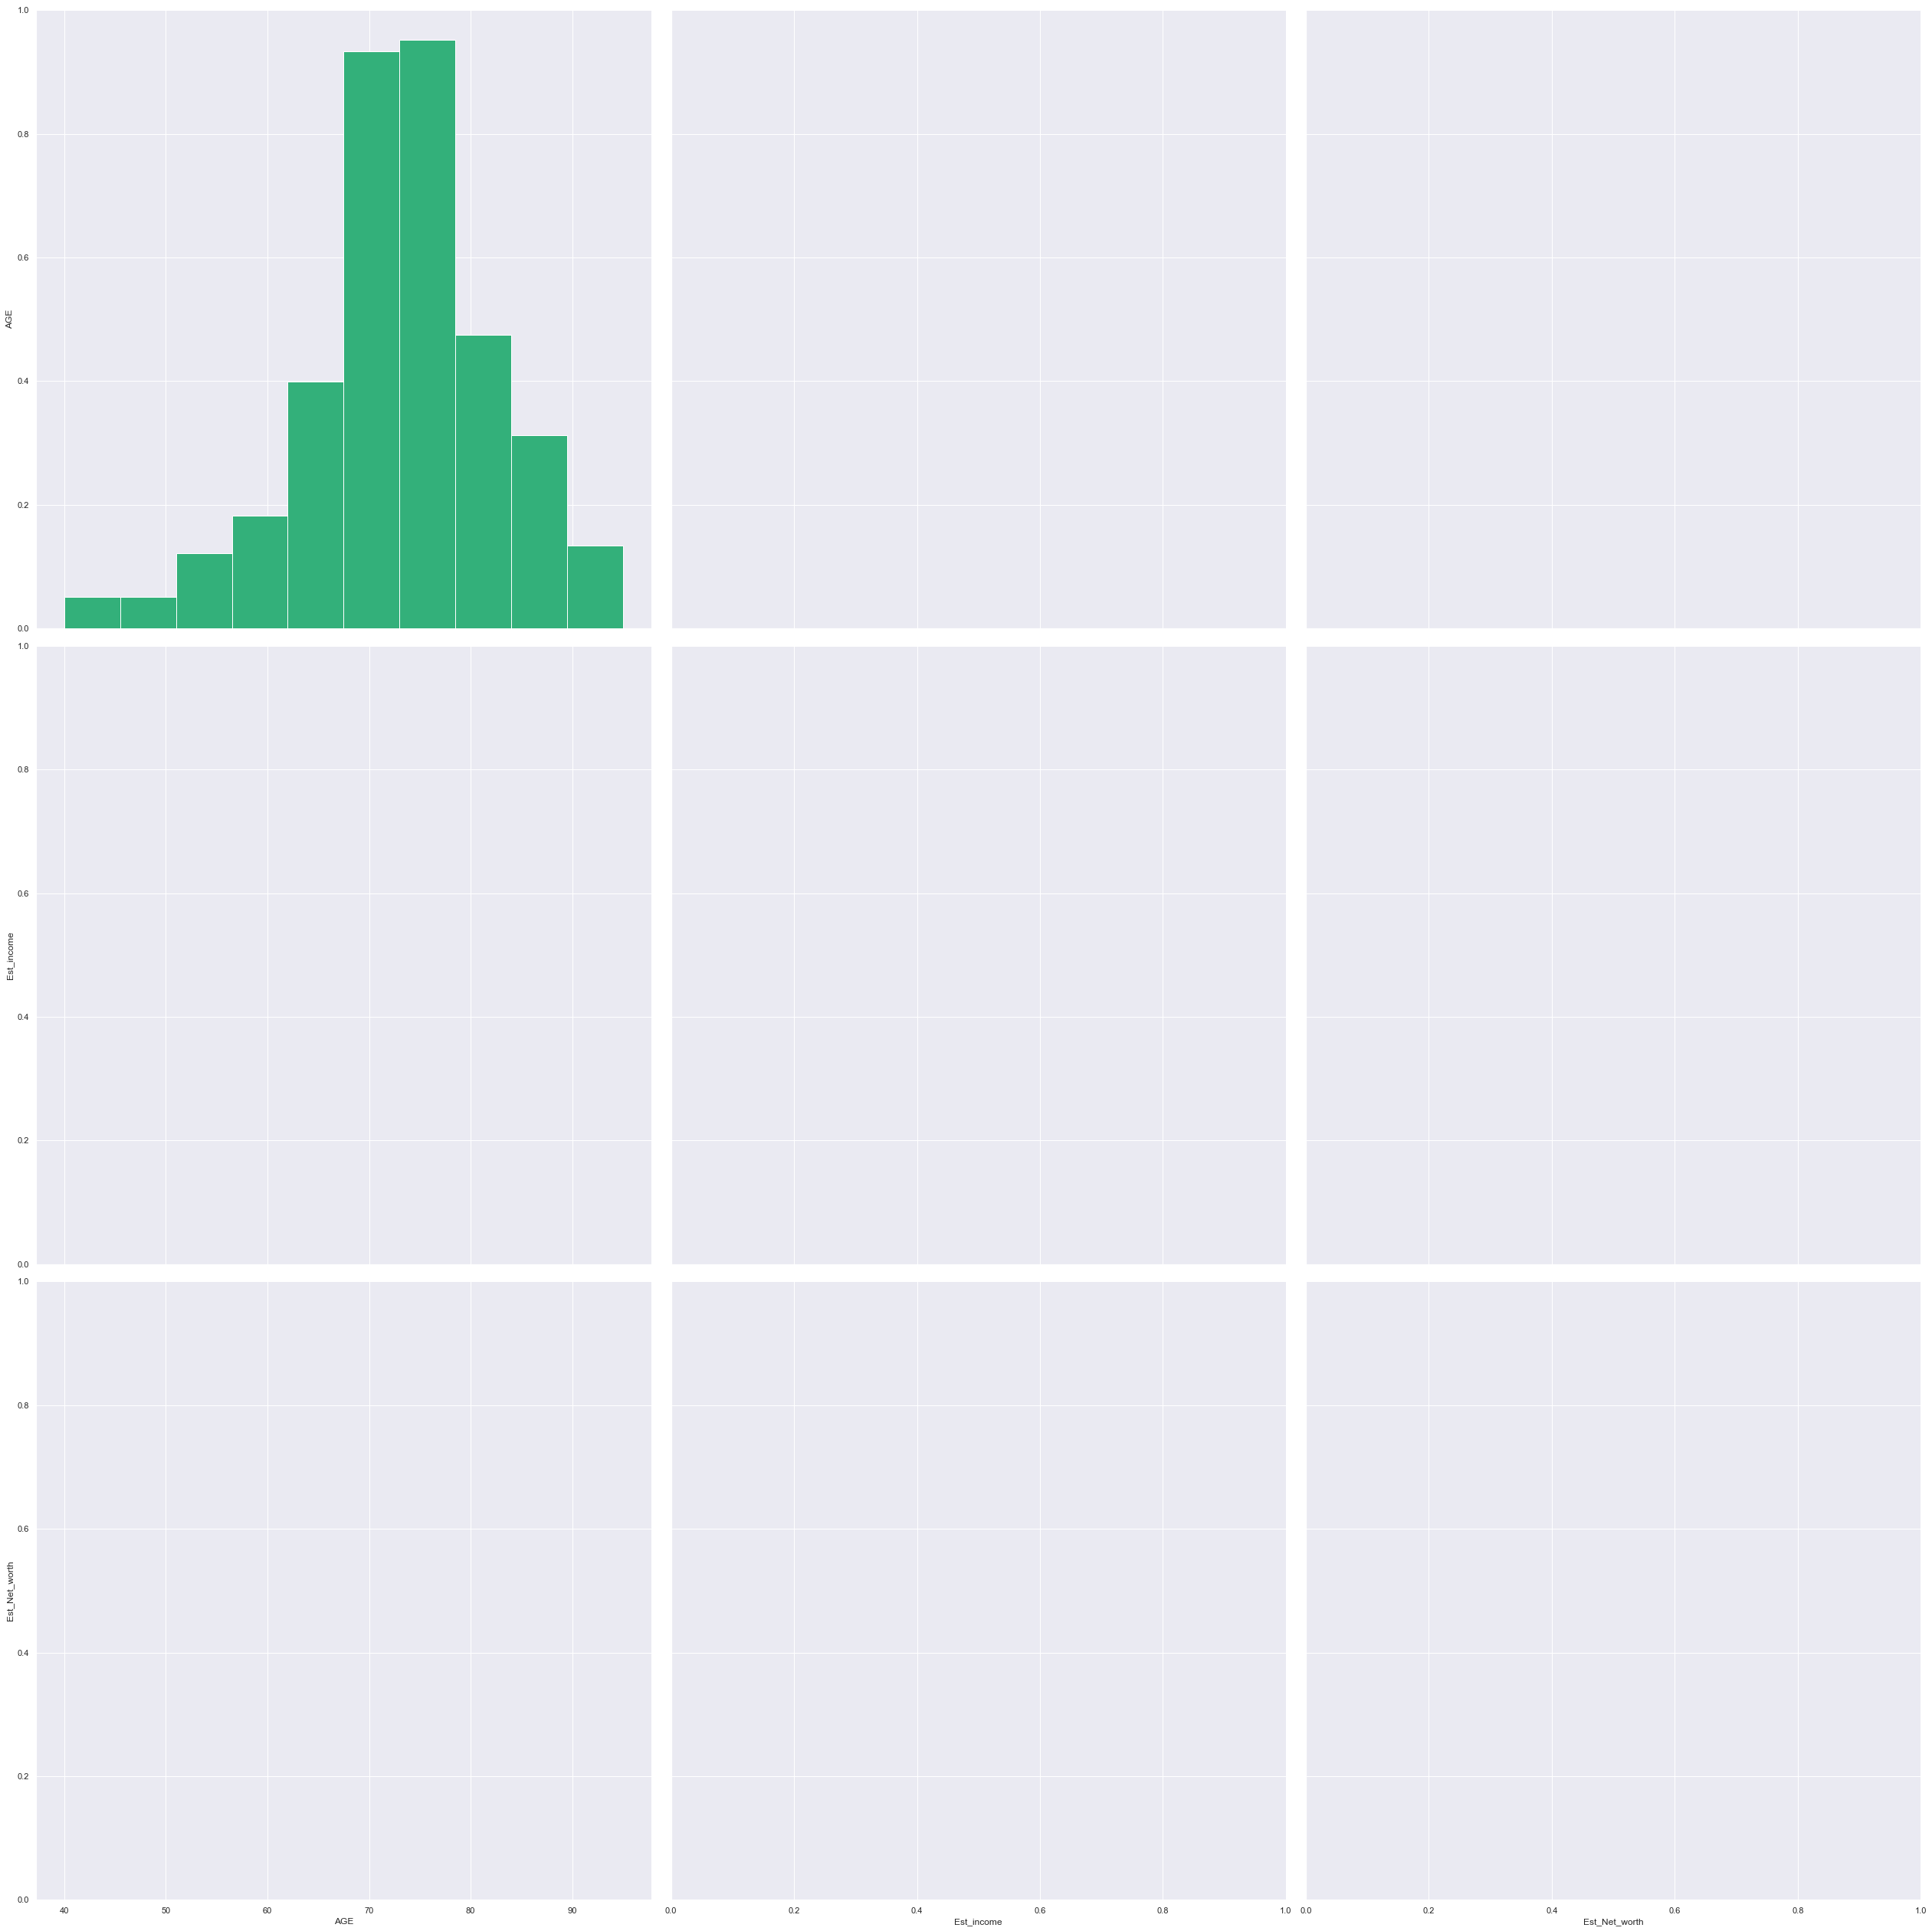

In [20]:
sns.pairplot(data, hue = 'AMI_FLAG',vars= ['AGE', 'Est_income', 'Est_Net_worth'], palette=['#33b07a', '#f77189'], diag_kind = 'hist', height = 11.7)

## Handling NAs

In [124]:
# dataframe about number of nas
pd.DataFrame(data.isna().sum(), columns = ['counts']).sort_values('counts', ascending = False)

counts
Diab_Type                       64693
Decile_struggle_Med_lang        25215
Pct_above_poverty_line          12179
Education_level                 12179
Length_residence                12179
Est_BMI_decile                  12179
Num_person_household            12179
College                         12179
Online_User                     12179
Online_purchaser                12179
Dwelling_Type                   12179
Population_density_centile_US   12179
Population_density_centile_ST   12179
Index_Health_ins_influence      12179
Index_Health_ins_engage         12179
Est_income                      12179
Est_Net_worth                   12179
Pct_below_poverty_line          12179
Home_value                      12179
PCP_ASSIGNMENT                    157
MCO_PROD_TYPE_CD                   33
MCO_HLVL_PLAN_CD                   33
HOSPICE_IND                        32
ESRD_IND                           32
LIS                                30
INSTITUTIONAL                      30
DUAL                               30
ORIG_REAS_ENTITLE_CD               30
SEX_CD                             30
RX_THER_36_YR2016                   0
...                               ...
CON_VISIT_22_Q04                    0
CON_VISIT_20_Q01                    0
POT_VISIT_11_Q03                    0
POT_VISIT_81_Q01                    0
POT_VISIT_31_Q01                    0
POT_VISIT_21_Q02                    0
POT_VISIT_21_Q01                    0
POT_VISIT_19_Q03                    0
POT_VISIT_41_Q04                    0
POT_VISIT_21_Q04                    0
POT_VISIT_20_Q01                    0
POT_VISIT_19_Q04                    0
POT_VISIT_19_Q01                    0
POT_VISIT_23_Q04                    0
POT_VISIT_81_Q03                    0
POT_VISIT_23_Q03                    0
POT_VISIT_23_Q01                    0
POT_VISIT_22_Q01                    0
POT_VISIT_12_Q04                    0
POT_VISIT_12_Q03                    0
POT_VISIT_12_Q01                    0
POT_VISIT_22_Q04                    0
POT_VISIT_22_Q03                    0
POT_VISIT_19_Q02                    0
POT_VISIT_12_Q02                    0
POT_VISIT_22_Q02                    0
POT_VISIT_81_Q04                    0
POT_VISIT_81_Q02                    0
POT_VISIT_23_Q02                    0
STATIN_ELIG                         0

[448 rows x 1 columns]

In [18]:
# replacing diab_type data column
data['Diab_Type'].fillna('No Diabetes', inplace = True)

In [19]:
rows_to_remove = ['PCP_ASSIGNMENT',
'MCO_HLVL_PLAN_CD',
'MCO_PROD_TYPE_CD',
'ESRD_IND',
'HOSPICE_IND',
'SEX_CD',
'ORIG_REAS_ENTITLE_CD',
'DUAL',
'INSTITUTIONAL',
'LIS']

In [20]:
data.dropna(axis = 0, how = 'any', subset = rows_to_remove, inplace= True)

### Predicting N/A Values using models

In [21]:
columns_to_remove = ['ID', 'AMI_FLAG','Dwelling_Type']

In [22]:
target_columns = ['Education_level',
'Length_residence',
'Est_BMI_decile',
'Num_person_household',
'College',
'Online_purchaser',
'Online_User',
'Pct_above_poverty_line',
'Pct_below_poverty_line',
'Home_value',
'Est_Net_worth',
'Est_income',
'Index_Health_ins_engage',
'Index_Health_ins_influence',
'Population_density_centile_ST',
'Population_density_centile_US']

In [25]:
for target_column in target_columns:
    data[target_column].fillna(data[target_column].median(), inplace = True)

In [26]:
# for target_column in target_columns:
#     if (len(data[target_column].value_counts()) == 2):
#         model = RandomForestClassifier()
#     elif (data[target_column].dtype == float):
#         model = RandomForestRegressor()
#     else:
#         continue

#     data_nas = data.loc[data[target_column].isna()== True]
#     data_no_nas = data.loc[data[target_column].isna()== False]
#     data_nas.drop(columns_to_remove, axis = 1, inplace = True, errors = 'ignore')
#     data_no_nas.drop(columns_to_remove, axis = 1, inplace = True, errors = 'ignore')

#     columns_with_na = data_nas.columns[data_nas.isna().any()].tolist()

#     columns_with_na.remove(target_column)

#     data_nas.drop(columns_with_na, axis = 1, inplace = True, errors = 'ignore')
#     data_no_nas.drop(columns_with_na, axis = 1, inplace = True, errors = 'ignore')

#     for i in data_nas.columns:
#         if data_nas[i].dtype == object:
#             if i == 'AMI_FLAG':
#                  continue
#     #         print(i)
#     #         print(data[i].dtype)
#     #         print(len(data[i].unique()))
#             if len(data_nas[i].unique()) == 2:
#                 dummy = pd.get_dummies(data_nas[i],prefix=i, drop_first=True)
#             else:
#                 dummy = pd.get_dummies(data_nas[i], prefix=i)
#             data_nas = pd.concat([data_nas,dummy], axis = 1)
#             data_nas.drop(i, axis = 1, inplace = True)

#     for i in data_no_nas.columns:
#         if data_no_nas[i].dtype == object:
#             if i == 'AMI_FLAG':
#                  continue
#     #         print(i)
#     #         print(data[i].dtype)
#     #         print(len(data[i].unique()))
#             if len(data_no_nas[i].unique()) == 2:
#                 dummy = pd.get_dummies(data_no_nas[i],prefix=i, drop_first=True)
#             else:
#                 dummy = pd.get_dummies(data_no_nas[i], prefix=i)
#             data_no_nas = pd.concat([data_no_nas,dummy], axis = 1)
#             data_no_nas.drop(i, axis = 1, inplace = True)

#     x_train, y_train = data_no_nas.loc[:, data_no_nas.columns != target_column],data_no_nas[target_column]

#     x_test, y_test = data_nas.loc[:, data_nas.columns != target_column],data_nas[target_column]

#     scale = StandardScaler()

#     scale.fit(x_train)

#     x_train = scale.transform(x_train)

#     x_test = scale.transform(x_test)



#     model.fit(x_train, y_train)

#     y_predicted = model.predict(x_test)

#     data[target_column].fillna(pd.Series(y_predicted, index=y_test.index), inplace = True)

In [27]:
# Handling Decile_medical_strggle_med_lang
for i in data['College'].unique():
    data.loc[data['College']==i,'Decile_struggle_Med_lang'] =  data[data['College']==i]['Decile_struggle_Med_lang'].fillna(data[data['College']==i]['Decile_struggle_Med_lang'].median())

## Save Data

In [28]:
data.to_csv('intermediate_data.csv', index = False)